# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `KNN Classifiers`.


## Instructions
- Do not Use Direct Inbuilt functions for the Task.
- Numpy or other math libraries are allowed 
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not change the contents of the Given cells. Use new cells to Write your code.


## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q1.ipynb`
- Fill the Name and Roll number in the below markdown

Name: Anjali Singh <br>
Roll Number: 2020102004

### Dataset

Use the code below to load the Dataset

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
# Load data
iris = pd.read_csv('Iris.csv')

#data cleaning
iris.drop(columns="Id",inplace=True)

In [7]:
# features and labels
X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values

#Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

Write your Code below for KNN Classifier.<br>
Use different values of K and test the accuracies.

In [8]:

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# looping over k values



#### Euclidean Distance

$$ d(x, y) = (\sum_{i=1}^{n} (x_i - y_i)^2)^{(1/2)} $$

In [10]:
def knn(xTrain, xTest, k):

    # the following formula calculates the Euclidean distances.
    # np.sum((xTrain-xTest)^2)
    distances = -2 * np.dot(xTrain, xTest.T) + np.sum(xTest**2,axis=1) + np.sum(xTrain**2,axis=1)[:, np.newaxis]

    #because of numpy precision, some really small numbers might 
    #become negatives. So, the following is required.
    distances[distances < 0] = 0

    #for speed you can avoid the square root since it won't affect
    #the result, but apply it for exact distances.
    distances = np.sqrt(distances)
    indices = np.argsort(distances, 0) # get indices of sorted items
    distances = np.sort(distances, 0) # distances sorted in axis 0
    
    #returning the top-k closest distances.
    return indices[0:k, : ], distances[0:k, : ]

In [11]:
def knn_predictions(xTrain,yTrain,xTest,k=3):
    indices, distances = knn(xTrain, xTest, k)
    yTrain = yTrain.flatten()
    rows, columns = indices.shape
    # print("Indices rows and columns:", indices.shape)
    predictions = list()
    for j in range(columns):
        temp = list()
        for i in range(rows):
            cell = indices[i][j]
            temp.append(yTrain[cell])
        predictions.append(max(temp, key = temp.count)) # this is the key function, brings the mode value
    predictions = np.array(predictions)
    return predictions

In [12]:
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

Accuracies:- 
k = 0 100.0
k = 1 100.0
k = 2 96.66666666666667
k = 3 96.66666666666667
k = 4 96.66666666666667
k = 5 100.0
k = 6 100.0
k = 7 100.0
k = 8 100.0
k = 9 100.0
k = 10 100.0
k = 11 100.0
k = 12 100.0
k = 13 100.0
The best accuracy was: 100.0 % with k = 1


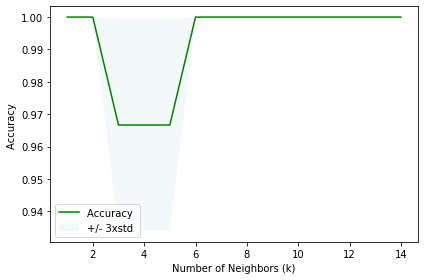

In [13]:
#will first check which is the best k
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
#ConfustionMx = [];
print("Accuracies:- ")
for n in range(1,Ks):    
    #Train Model and Predict

    yhat = knn_predictions(X_train, y_train, X_test, n)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)    
    std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

    print("k =", n-1, mean_acc[n-1]*100)

print( "The best accuracy was:", np.round(mean_acc.max()*100, 2), "% with k =", mean_acc.argmax()+1) 

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.05)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (k)')
plt.tight_layout()
plt.show()

### Questions

1) What are the Advantages and Disadvantages of KNN algorithm?<br>
2) What is the complexity of the KNN algorithm during Training and Testing?<br> 
3) Is euclidian distance the only distance metric used in KNN? 
4) what K value gave the best accuracy?

<b> Q1. What are the Advantages and Disadvantages of KNN algorithm ? </b><br>
<b> Advantages <br> </b>
- It doesn't learn anything in the training period, doesn't derive any discriminative function from the training data. <br>
- New data can be added without any worry since training is not required. 
- It's easy to implement. 
- It only requires the parameter K and the need of the distance function which can be either Euclidean or Manhattan or Minkowski distance. <br><br>
<b> Disadvantages </b> <br>
- Since KNN invlves the use of calculating distances between each existing point and the new point, it doesn't work well with large datasets. Therefore, affecting the performance of the algorithm. 
- It's also very sensitive towards noise in the dataset. We are supposed to manually search for the missing values and/or remove outliers. 
- KNN can generate wrong predictions, that's why we need to do feature scaling before applying the algorithm. 

<b> Q2. What is the complexity of the KNN algorithm during Training and Testing? </b> <br>
For training, the complexity is constant, i.e., $O(1)$. <br>
For testing, the complexity depends on the number of test samples, i.e., $O(n)$. 

<b> Q3. Is Euclidean distance the only distance metric used in KNN? </b><br>
No, there are other distance metrices that can be used other than Euclidean diistance depending on the need, such as, Manhattan distance or the Minkowski distance or the cosine distance.

<b> Q4. What K value gave the best accuracy? </b> <br>
K = 1 gave 100% accuracy. 